In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('darkgrid') #Config general params
plt.rcParams['font.size']=15 
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [8]:
data=pd.read_csv('world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [9]:
data_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data=data[data_columns].copy()

In [10]:
happy_df=data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'},axis=1)
happy_df.head()
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
ladder_score                    0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

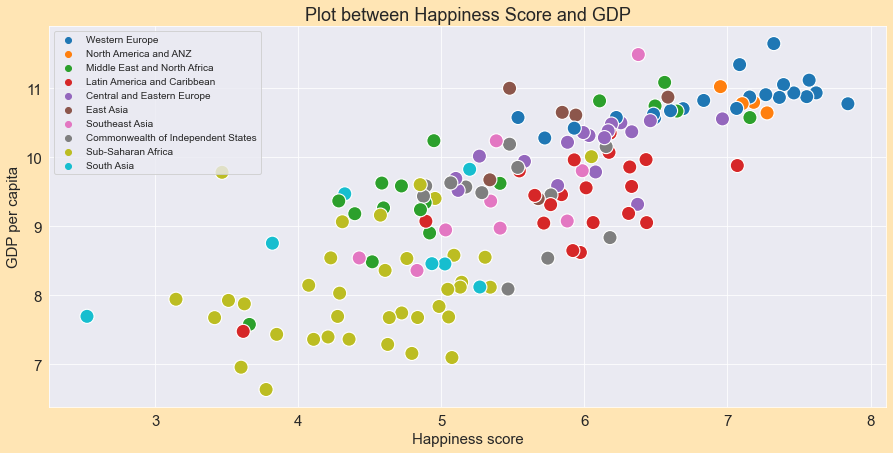

In [27]:
#Plot b/w happiness and GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df.ladder_score,y=happy_df.logged_gdp_per_capita,hue=happy_df.regional_indicator,s=200)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_gdp_per_capita, dtype: float64


Text(0, 0.5, '')

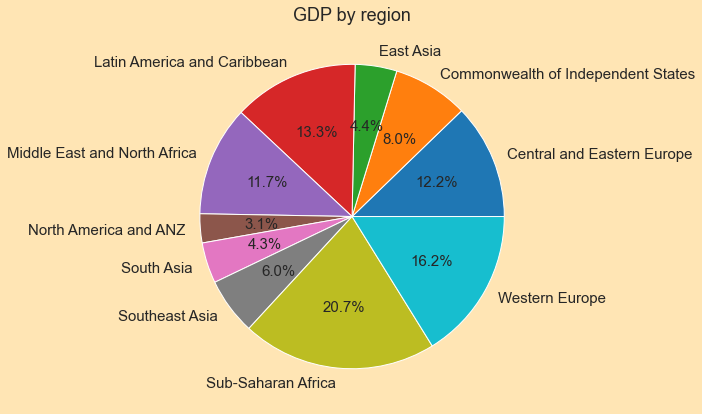

In [28]:
gdp_region=happy_df.groupby('regional_indicator')['logged_gdp_per_capita'].sum()
print(gdp_region)
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by region')
plt.ylabel('')

In [29]:
# Total countries

total_country=happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


<AxesSubplot:>

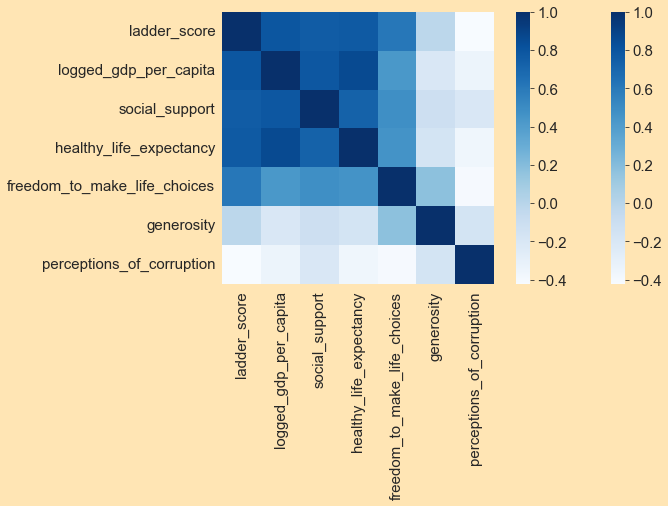

In [34]:
cor=happy_df.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=bool),cmap='Blues',square=True,ax=ax)
# sns.heatmap(cor,cmap='Blues',square=True,ax=ax)

In [36]:
# Corruption in regions

corruption=happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

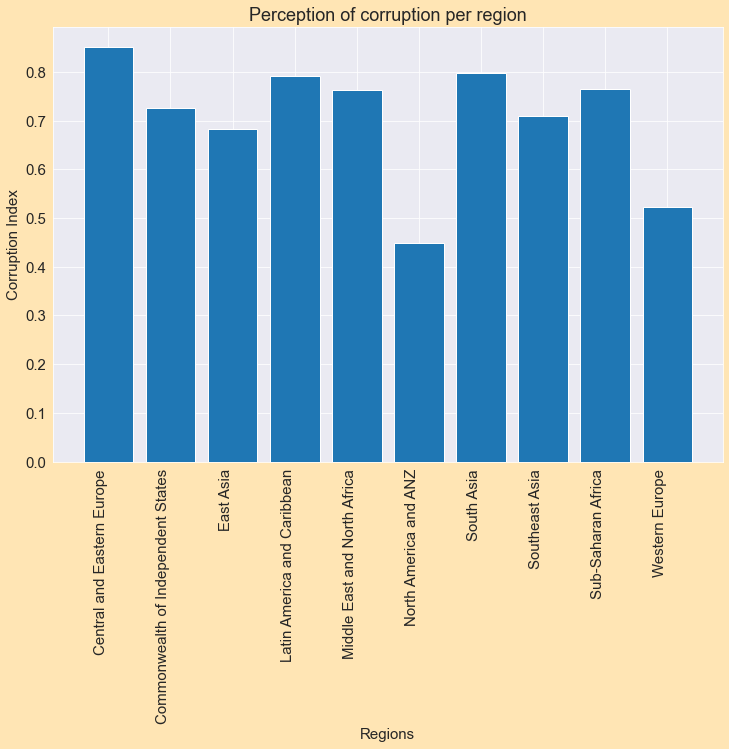

In [39]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of corruption per region')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=90,ha='right')
plt.bar(corruption.index,corruption.perceptions_of_corruption)

In [40]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

<AxesSubplot:title={'center':'Bottom 10 least happy countries Life Expectancy'}, xlabel='country_name', ylabel='healthy_life_expectancy'>

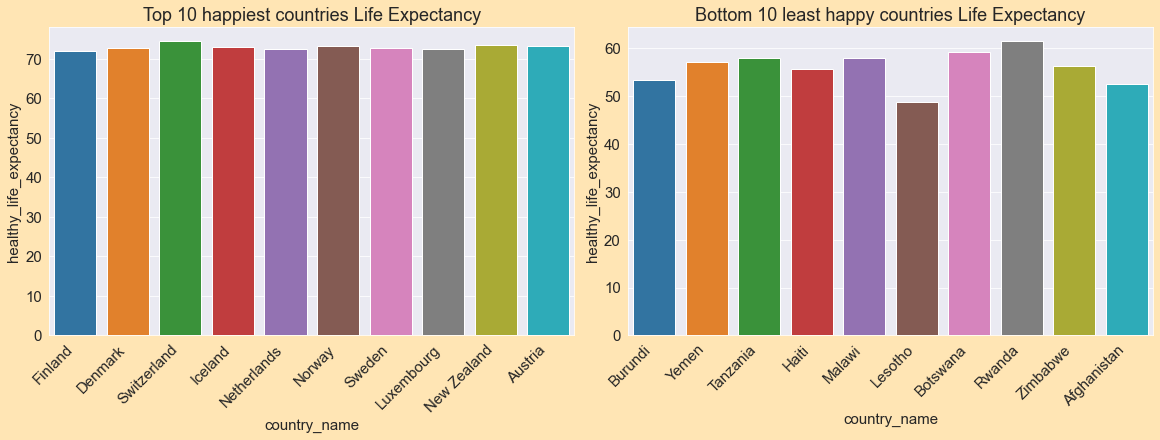

In [84]:
fig,axes=plt.subplots(1,2,figsize=(16,6))

'To solve the warning use Axis.set_xticks before set_xticklabels'
'Ref: https://pythonguides.com/matplotlib-set_xticklabels/'

xlabels=top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticks(np.arange(10))
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')
sns.barplot(x=top_10.country_name,y=top_10.healthy_life_expectancy,ax=axes[0])

xlabels=bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticks(np.arange(10))
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
axes[1].set_xlabel('Country name')
axes[1].set_ylabel('Life expectancy')
sns.barplot(x=bottom_10.country_name,y=bottom_10.healthy_life_expectancy,ax=axes[1])



Text(0, 0.5, 'Happiness score')

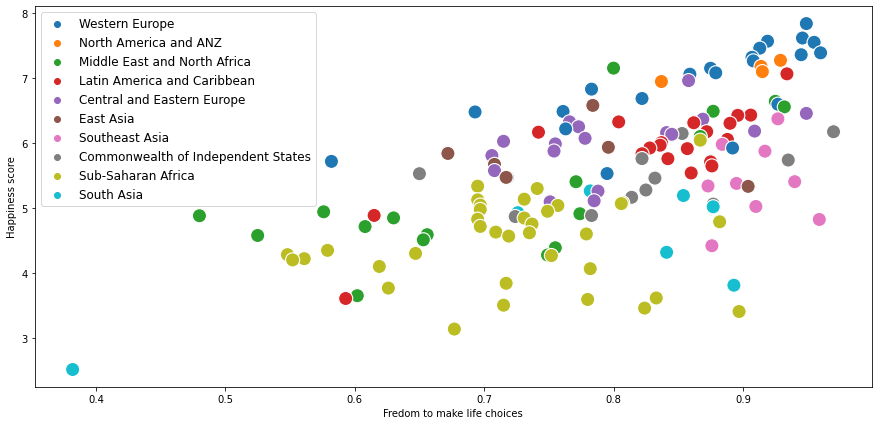

In [11]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices,y=happy_df.ladder_score,hue=happy_df.regional_indicator,s=200)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Fredom to make life choices')
plt.ylabel('Happiness score')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  149 non-null    object 
 1   regional_indicator            149 non-null    object 
 2   ladder_score                  149 non-null    float64
 3   logged_gdp_per_capita         149 non-null    float64
 4   social_support                149 non-null    float64
 5   healthy_life_expectancy       149 non-null    float64
 6   freedom_to_make_life_choices  149 non-null    float64
 7   generosity                    149 non-null    float64
 8   perceptions_of_corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


<BarContainer object of 10 artists>

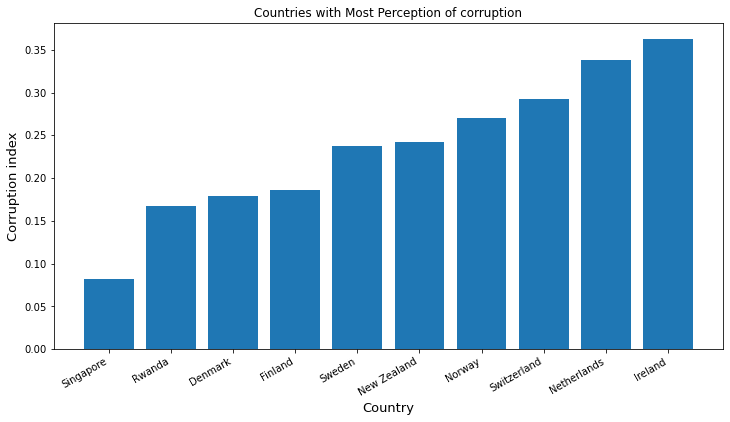

In [18]:
# Obtain the top ten
happy_df.info()
country=happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Most Perception of corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption index',fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.bar(country.country_name,country.perceptions_of_corruption)

Text(0, 0.5, 'Corruption')

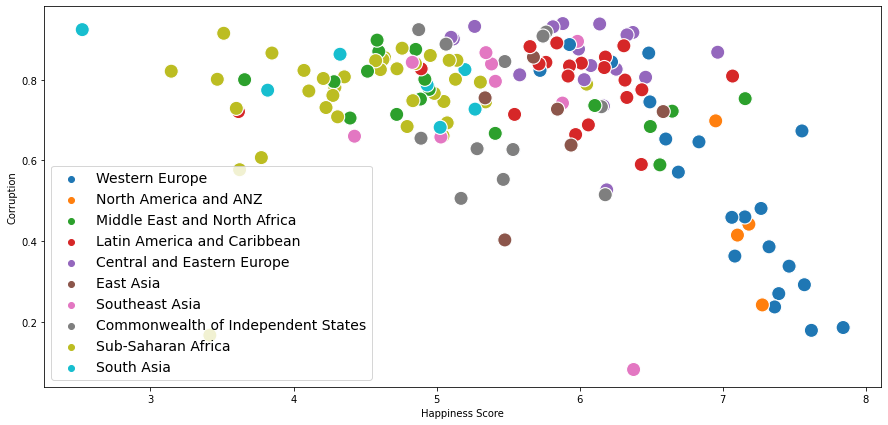

In [19]:
# Corruption vs Hapiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.ladder_score,y=happy_df.perceptions_of_corruption,hue=happy_df.regional_indicator,s=200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')